In [1]:
import torch
import torchvision
import numpy as np
import model_training
import models
import matplotlib.pyplot as plt
import random

In [2]:
path = 'dataset/entities'
Xtr = torch.FloatTensor(np.load('dataset/entities/entities_image.npy'))[:,:,:,0:4]
print(Xtr.shape)

ytr = np.load('dataset/entities/entities_label.npy')

unis = []
for ab in ytr:
    if ab in unis:
        pass
    else:
        unis.append(ab)
        
print(unis)

torch.Size([2580, 32, 32, 4])
['entities_humanoid', 'entities_humanoid_human', 'entities_humanoid_humanlike', 'entities_humanoid_humanlike_demonspawn', 'entities_humanoid_humanlike_spriggan', 'entities_humanoid_undead', 'entities_nonhumanoid', 'entities_nonhumanoid_aberration', 'entities_nonhumanoid_abyss', 'entities_nonhumanoid_amorphous', 'entities_nonhumanoid_animals', 'entities_nonhumanoid_aquatic', 'entities_nonhumanoid_demons', 'entities_nonhumanoid_Dragon', 'entities_nonhumanoid_eyes', 'entities_nonhumanoid_fungi_plants', 'entities_nonhumanoid_half-human', 'entities_nonhumanoid_holy', 'entities_nonhumanoid_log', 'entities_nonhumanoid_nonliving']


In [3]:
idx = ytr[ytr == 'entities_nonhumanoid_log']

for y in ytr:
    if y == 'entities_humanoid_humanlike_demonspawn':
        y = ''

entities_nonhumanoid


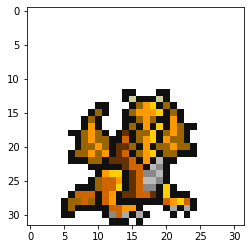

In [4]:
ind = random.randint(0,2580)
plt.imshow(Xtr[ind])
print(ytr[ind])

In [5]:
import torch.nn.functional as F

In [6]:
def one_hot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot

yhot = torch.FloatTensor(one_hot(ytr))

In [7]:
print(yhot, yhot.shape)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) torch.Size([2580, 20])


In [8]:
print(type(Xtr), type(yhot))

print(torch.min(Xtr), torch.max(Xtr))

Xtr = torchvision.transforms.Resize(64)(torchvision.transforms.Normalize(mean=[0.5], std=[0.5])(torch.FloatTensor(Xtr).permute(0,3,1,2)))
print(torch.min(Xtr), torch.max(Xtr))
print(Xtr.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor(0.) tensor(1.)
tensor(-1.) tensor(1.)
torch.Size([2580, 4, 64, 64])


d loss tensor(0.5733)
g loss tensor(2.5675)


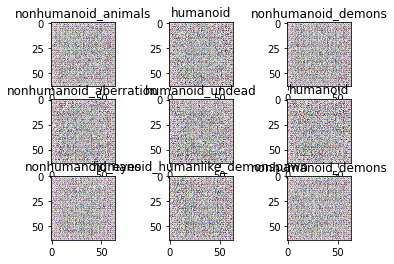

d loss tensor(0.9578)
g loss tensor(2.0799)


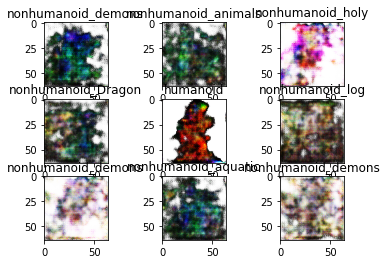

d loss tensor(0.5302)
g loss tensor(2.2912)


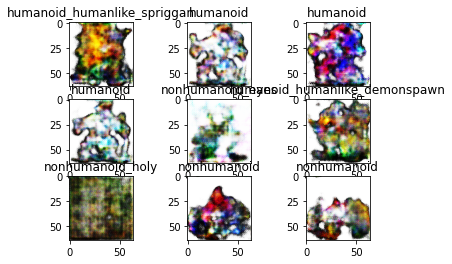

d loss tensor(0.5108)
g loss tensor(2.6274)


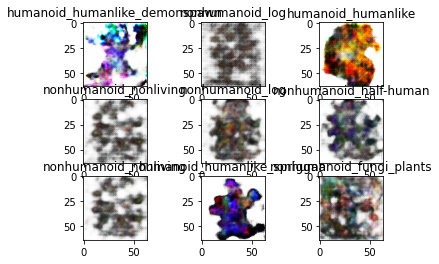

d loss tensor(0.5031)
g loss tensor(2.6679)


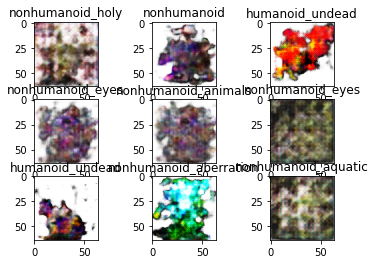

d loss tensor(0.2906)
g loss tensor(2.8230)


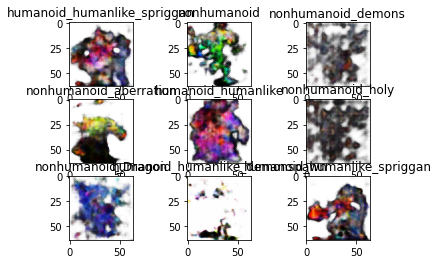

d loss tensor(0.3111)
g loss tensor(3.1332)


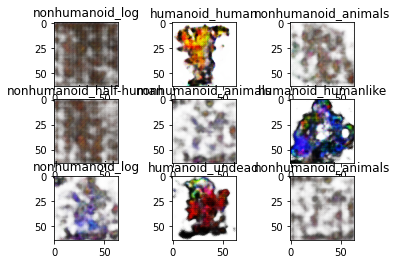

d loss tensor(0.5018)
g loss tensor(4.0779)


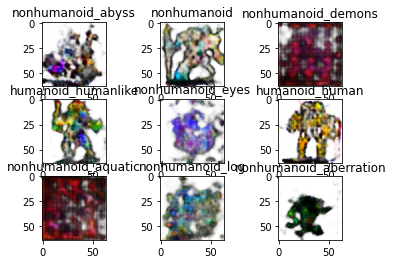

d loss tensor(0.3425)
g loss tensor(3.2830)


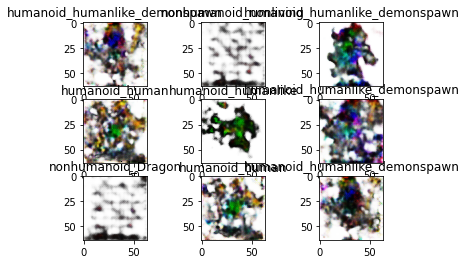

d loss tensor(0.2424)
g loss tensor(3.7898)


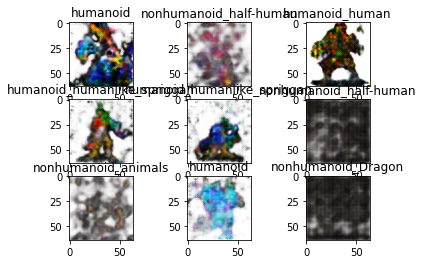

d loss tensor(0.1529)
g loss tensor(4.3788)


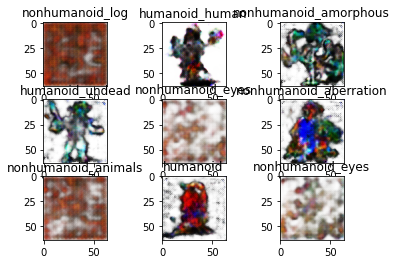

In [9]:
zdim = 128 #tune
cdim = yhot.shape[1]


nf = 32 #tune
bs = 128 #tune

G = models.Conditional_Decoder(nf, Xtr.shape[1], zdim, cdim)
D = models.Conditional_Encoder(nf, Xtr.shape[1], 1, cdim)

#Xtr = Xtr.to(device)
#yhot = yhot.to(device)

dataloader = torch.utils.data.DataLoader(dataset=list(zip(Xtr, yhot)), batch_size = bs, shuffle = True, num_workers = 1)

outmod, acgan_train, acgan_test, accs = model_training.train_acgan(G, D, dataloader, None)

In [10]:
# Could also do a GAN if this is not what we want